# PHASE 1: BUSINESS AND DATA UNDERSTANDING

#### Alzheimer’s disease causes progressive cognitive decline and loss of independenc Traditional diagnosis methods are expensive and time consuming. Delayed diagnosis reduces treatment effectiveness while early detection enables timely intervention

#### The solution proposed is to utilise an interactive test which is cost-effective screening compared to imaging tests and if a positive is found, the patient can be forwarded to specialists which in turn, is a scalable solution for hospitals and telemedicine platforms

#### This is a Prediction problem and the dataset was sourced from Kaggle "https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset"


# PHASE 2: DATA PREPARATION

## READING THE DATASET

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('alzheimers_disease_data.csv', encoding="ISO-8859-1")

## DESCRIBING THE DATA

In [20]:
data.head

<bound method NDFrame.head of       PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumpt

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [22]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## REMOVING UNNECESSARY COLUMNS

In [24]:
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

### It can be observed that there are no missing values and the data types, though varied are correct and the unnecessary columns have been removed

# PHASE 3: EXPLARATORY DATA ANALYSIS

## VISUALIZATIONS AND HEATMAP CORRELATION

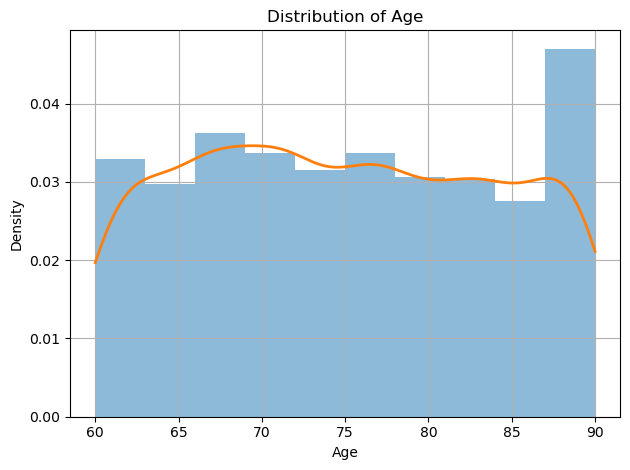

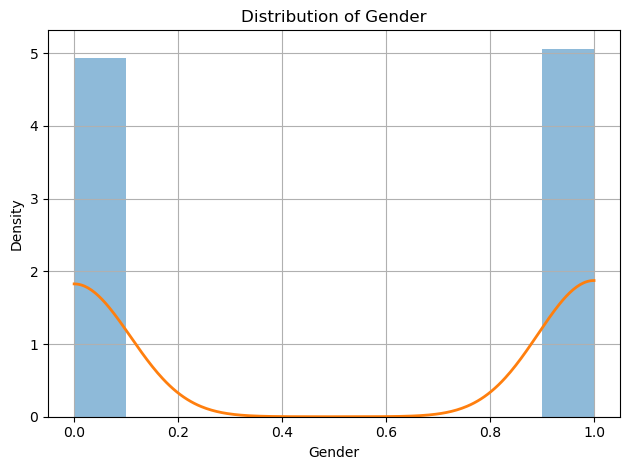

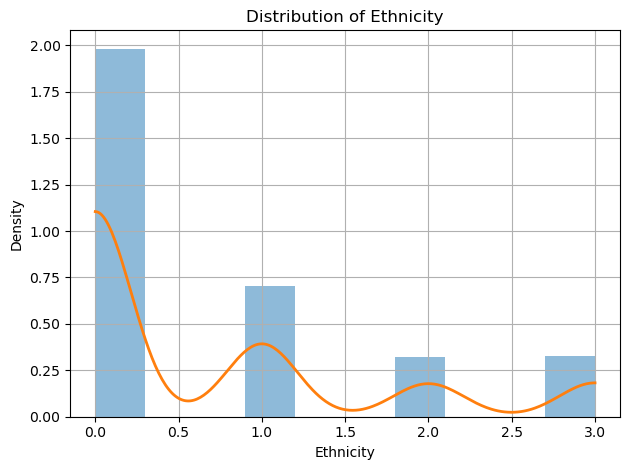

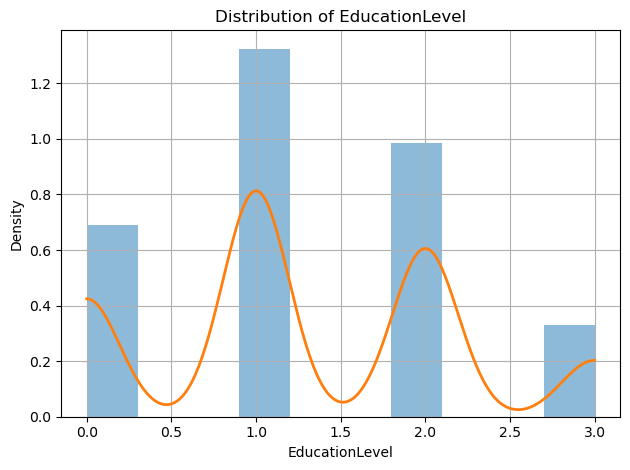

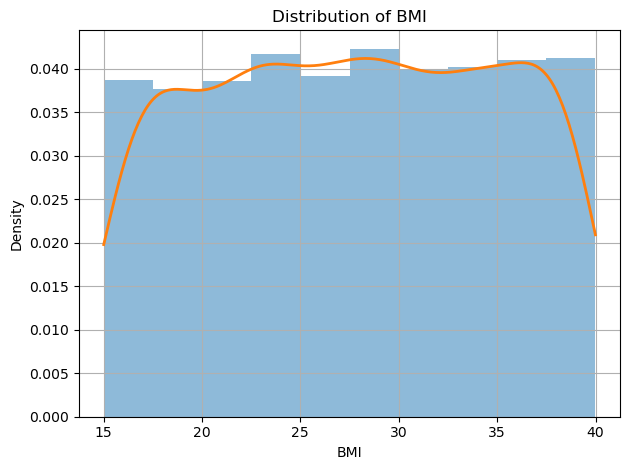

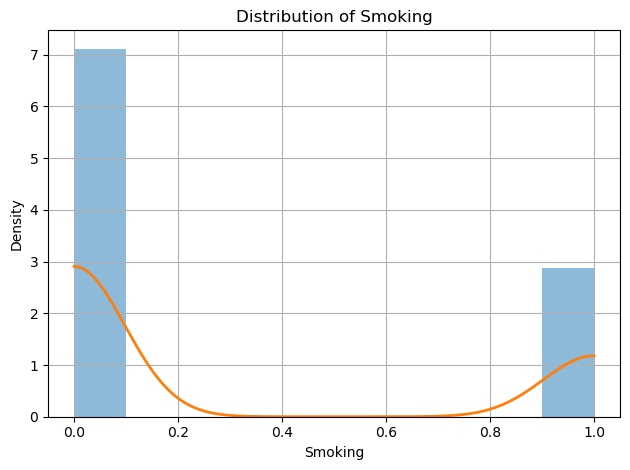

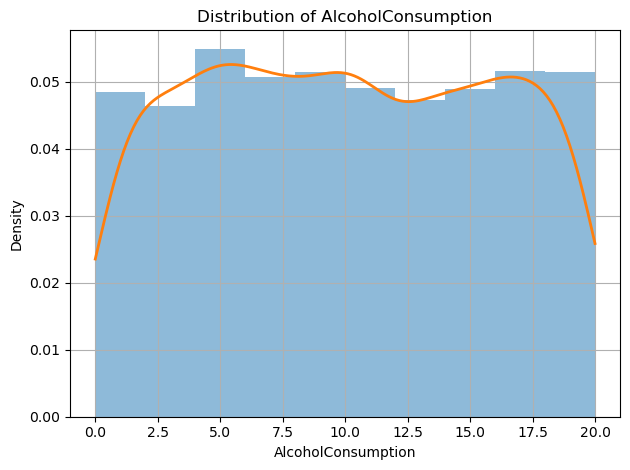

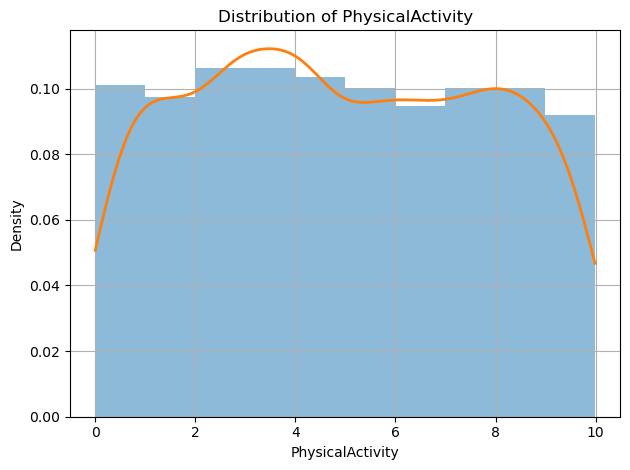

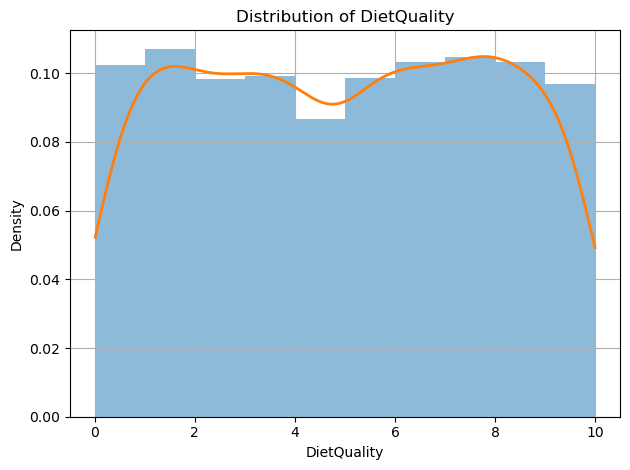

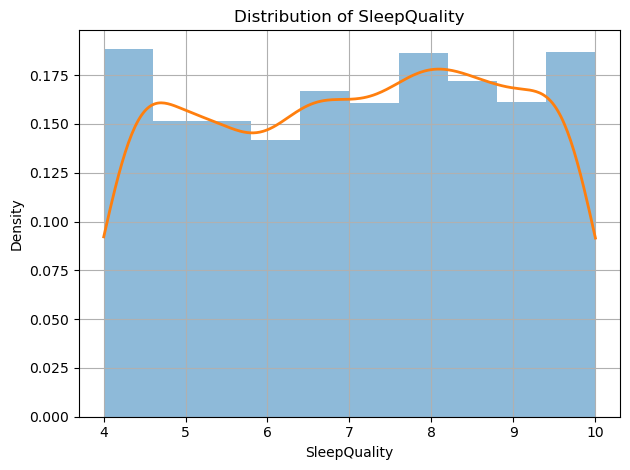

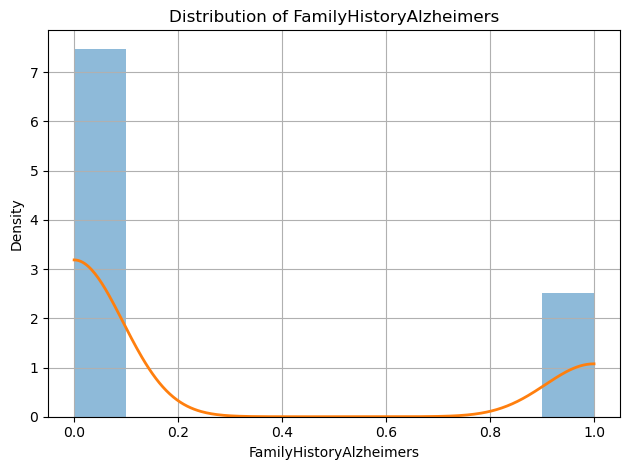

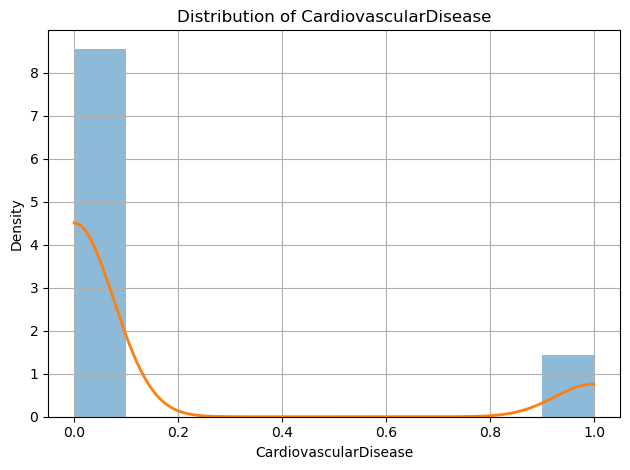

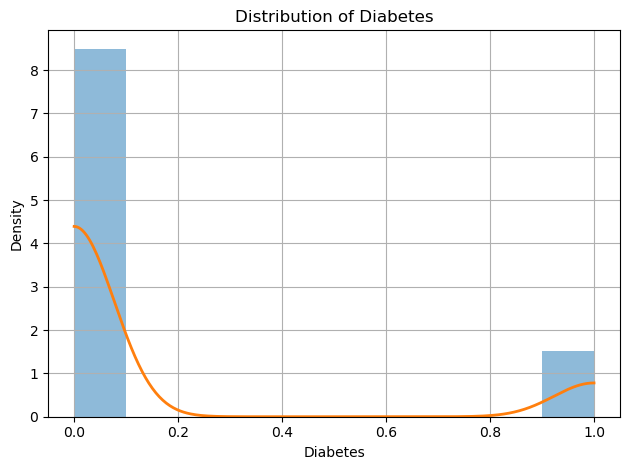

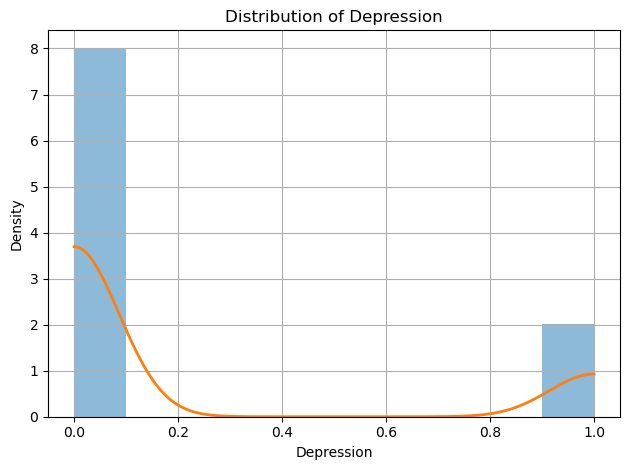

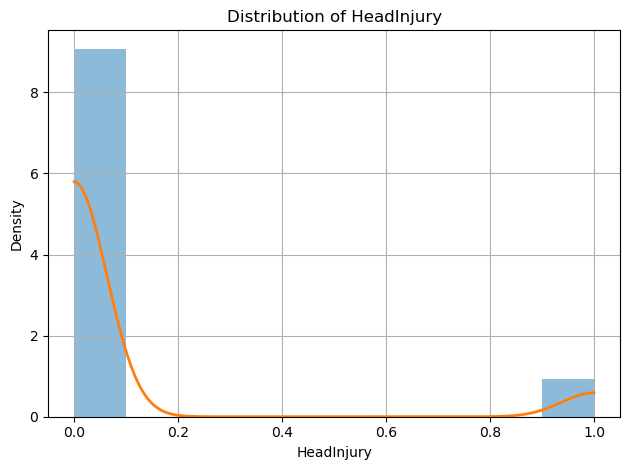

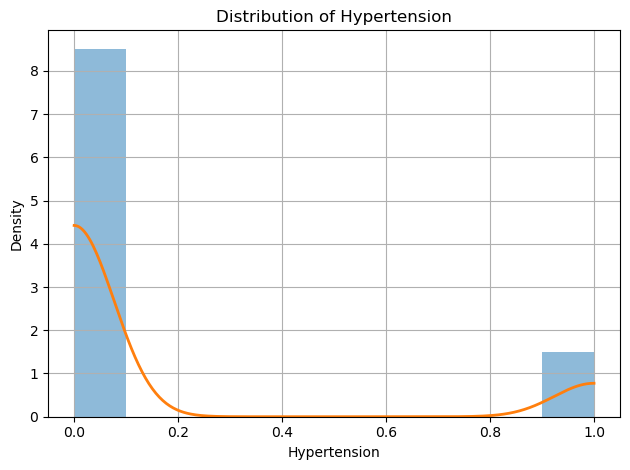

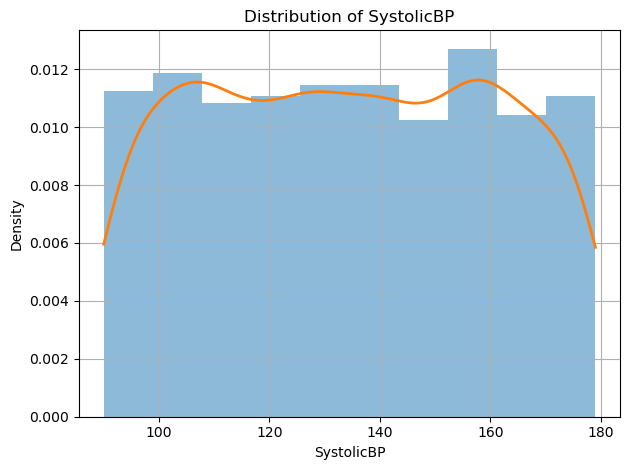

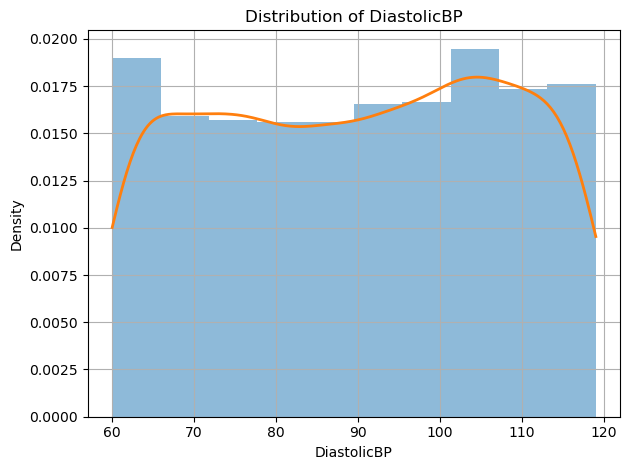

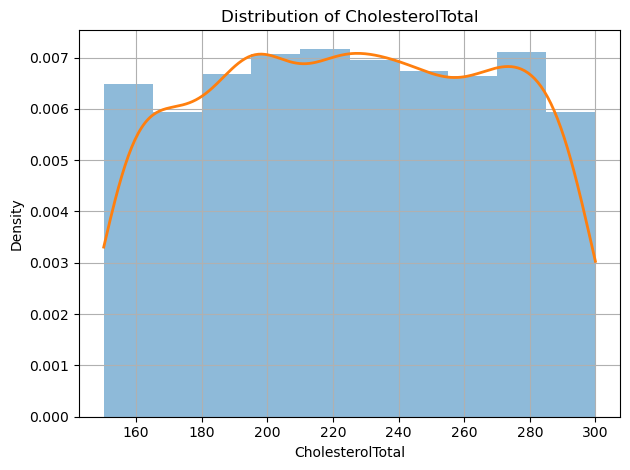

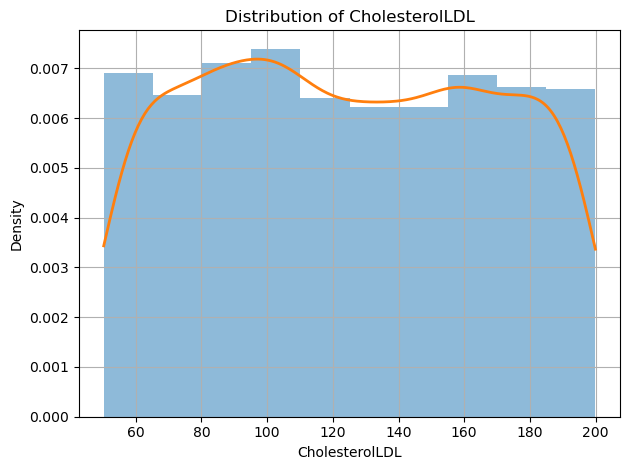

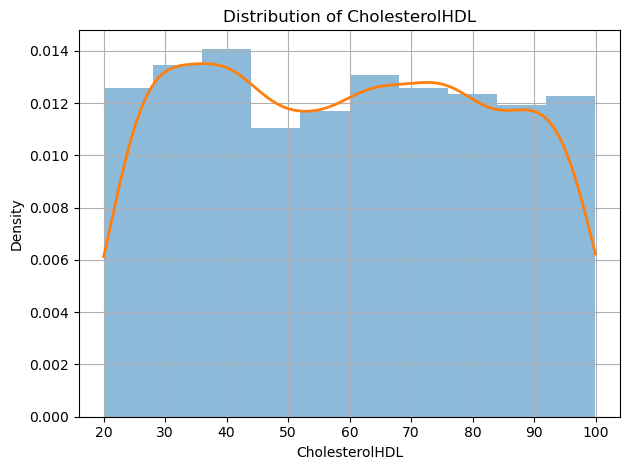

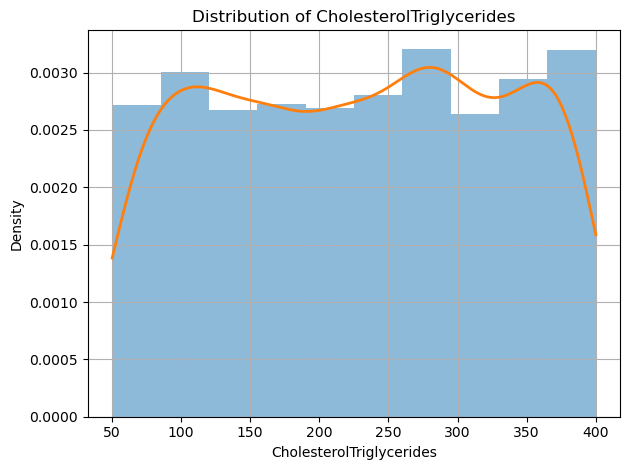

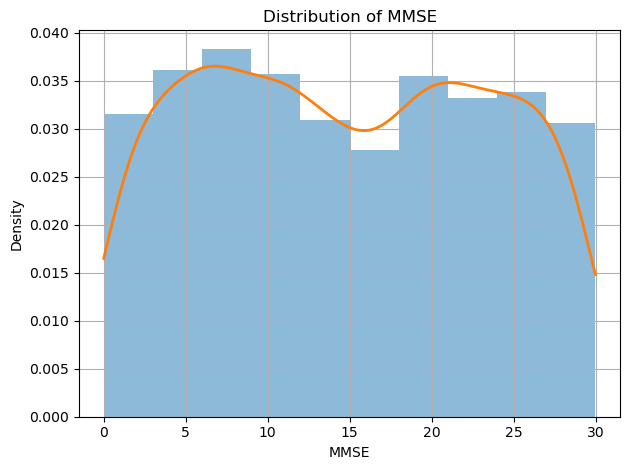

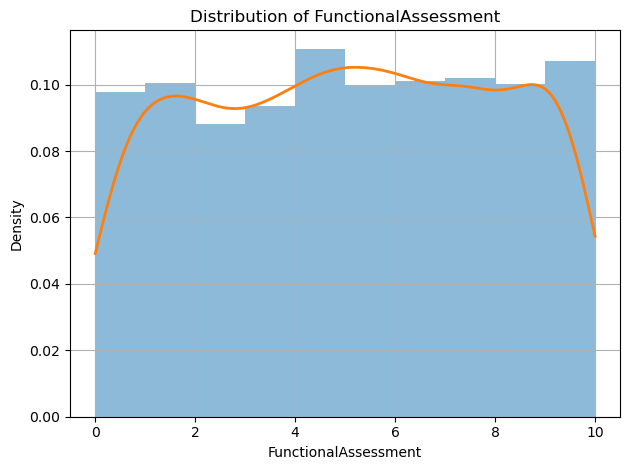

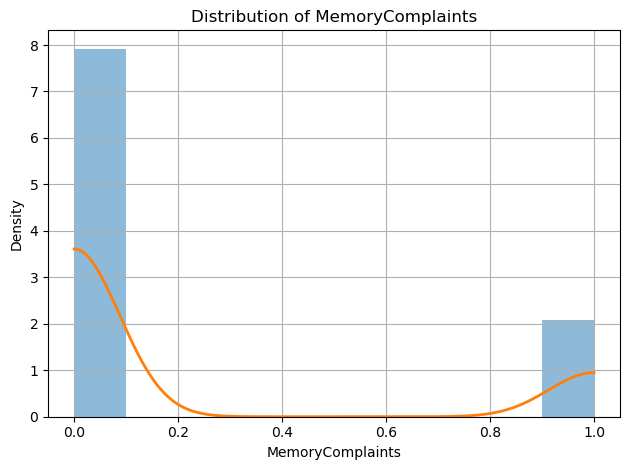

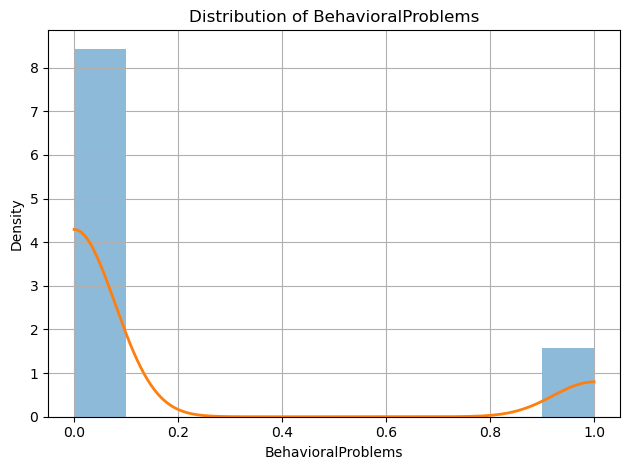

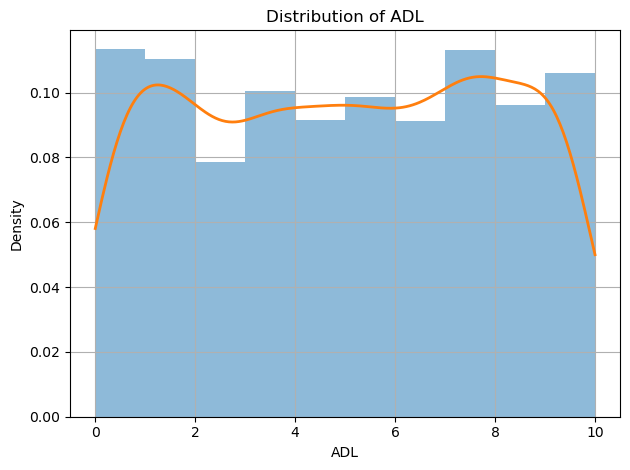

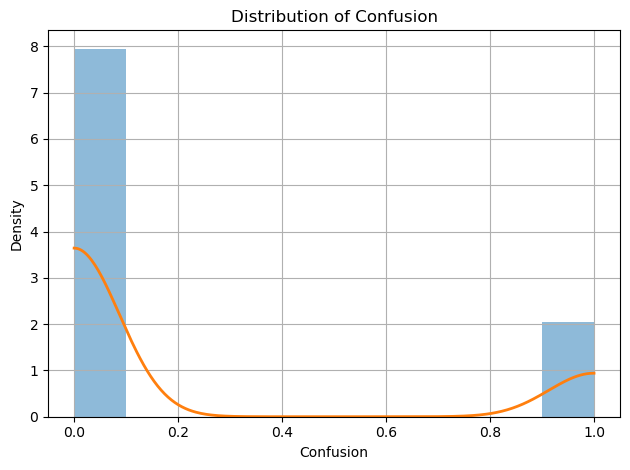

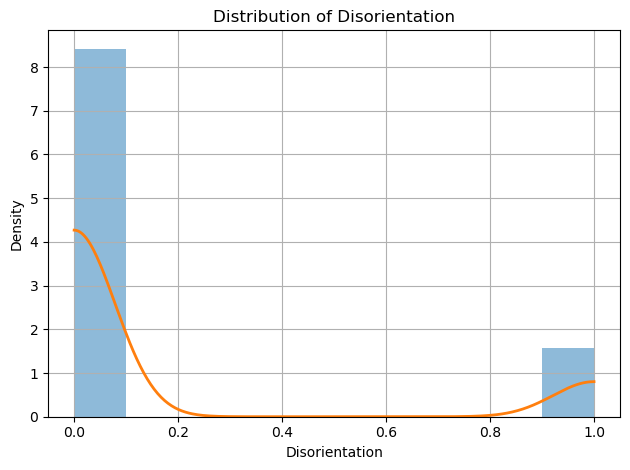

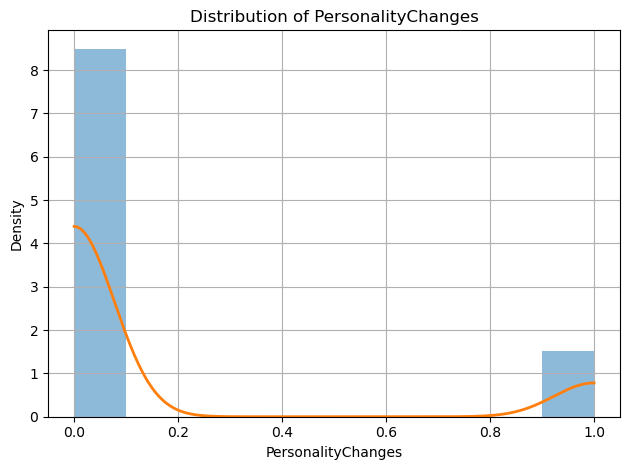

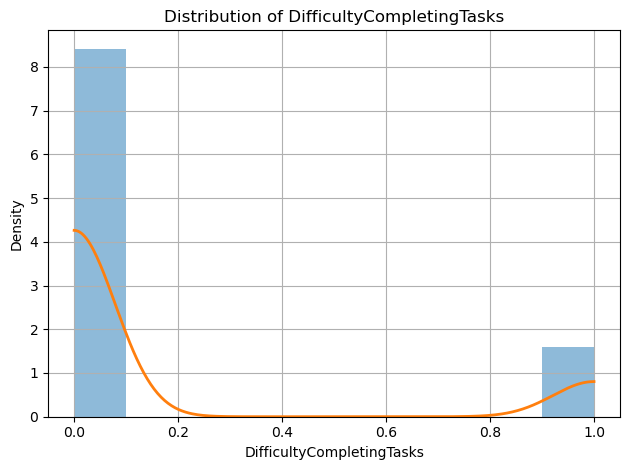

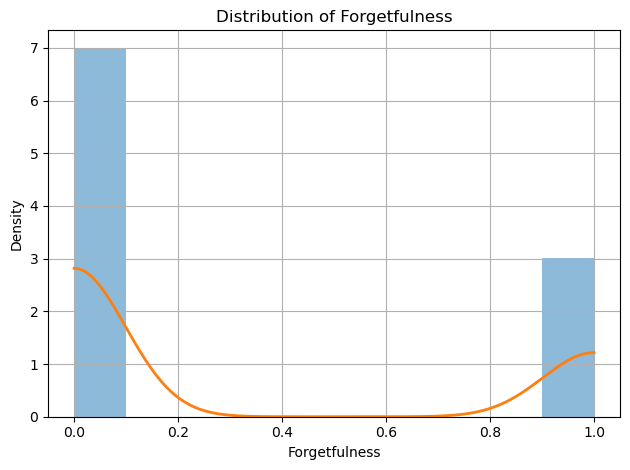

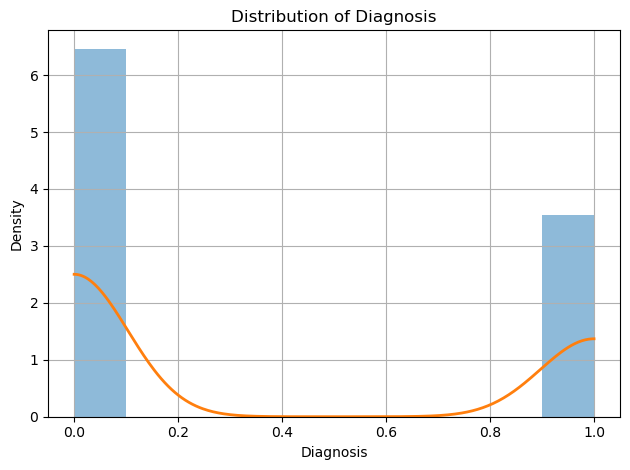

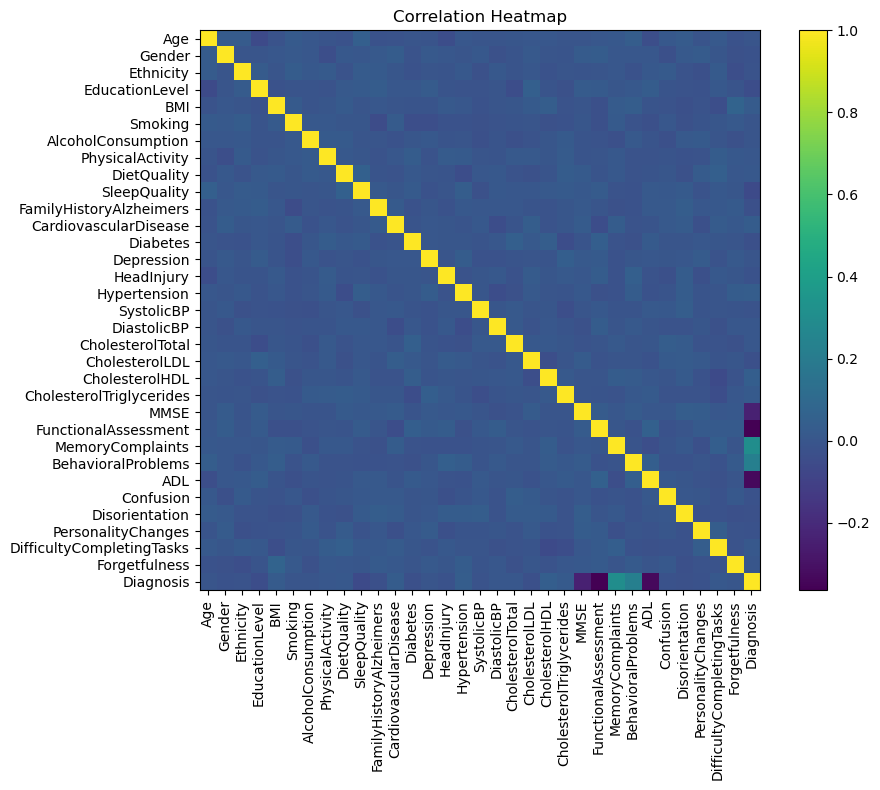

In [27]:
# Get numeric + categorical columns
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(exclude='number').columns

from scipy.stats import gaussian_kde
import numpy as np

# -----------------------------------------------------
# 2. Histogram for all numeric features (one by one)
# -----------------------------------------------------
for col in num_cols:
    plt.figure()
    
    # Histogram
    data[col].hist(density=True, alpha=0.5)

    # ---- KDE LINE (added) ----
    kde = gaussian_kde(data[col].dropna())
    x_vals = np.linspace(data[col].min(), data[col].max(), 300)
    plt.plot(x_vals, kde(x_vals), linewidth=2)
    # --------------------------

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# 3. Boxplots (detect outliers in key features)
# ---------------------------------------------
#for col in num_cols:
#    plt.figure()
#    data.boxplot(column=col)
#    plt.title(f"Boxplot of {col}")
#    plt.tight_layout()
#    plt.show()


# ----------------------------------------------------
# 4. Correlation heatmap 
# ----------------------------------------------------
import numpy as np

plt.figure(figsize=(10, 8))
corr = data[num_cols].corr()
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Heatmap")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()






#### The histograms represent the distribution of various features to density where 0 is least, while the heatmap reveals that the features do not have any strong correlations among themselves. However, there are five columns that show a correlation with the target variable.

## PEARSONS CORRELATION

#### Pearson’s correlation is used to quantify the strength and direction of the linear relationship between variables. It produces numerical values between –1 and +1

In [31]:
# Pearson correlation for all numeric columns
pearson_corr = data.corr(method='pearson')

print("Pearson Correlation Matrix:")
print(pearson_corr)


Pearson Correlation Matrix:
                                Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347    

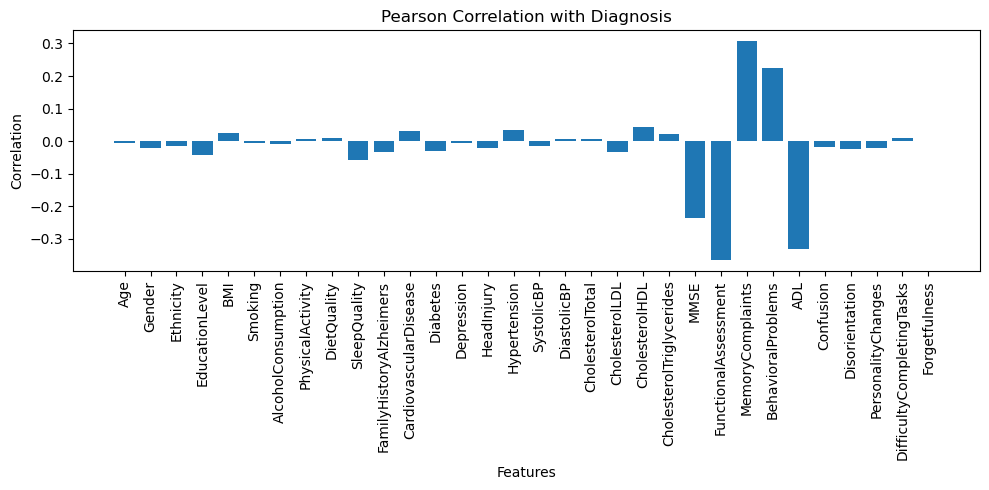

In [32]:
target = "Diagnosis"  

pearson_target = pearson_corr[target].drop(target)

plt.figure(figsize=(10,5))
plt.bar(pearson_target.index, pearson_target.values)
plt.title(f"Pearson Correlation with {target}")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Using Pearsons Correlation we can determine that MSE, Functional Assessment and ADL are negatively correlated to the target variable while Memory Complaints and Behavioral Problems are positively correlated to the target variable

#### MSE or MMSE is Mini-Mental State Examination which is a screening tool for cognitive function usually involving a questionnaire of 11 questions testing orientation, attention, calculation, language, memory
#### Functional Assessment is gathered from a family memberusing a FAST scale to track functional deline in stages
#### ADLs are routine daily self-care tasks performed everyday 

# PHASE 4: MODELING

## MODEL#1 RANDOM FOREST

#### This model was chosen due to its stability and because it handles non linear data well

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_csv("alzheimers_disease_data.csv")
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
# -----------------------------
# 2. Separate features + target
# -----------------------------
X = data.drop("Diagnosis", axis=1)   # all features
y = data["Diagnosis"]                # target

# If Diagnosis is categorical, convert to numeric
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# -----------------------------
# 3. Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# 4. Build Random Forest model
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# -----------------------------
# 5. Predictions
# -----------------------------
y_pred = rf.predict(X_test)

# -----------------------------
# 6. Evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9441860465116279

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430


Confusion Matrix:
[[270   8]
 [ 16 136]]


## MODEL#2 XG BOOST

#### This model was chosen because it is what is commonly used in smaller medical datasets since it handles mixed numerical and categorical data well

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------------
# 1. Prepare data (using 'data', not df)
# -----------------------------------------------------

# Identify target column
target_col = "Diagnosis"   # change if your target has a different name

# Encode target labels if they are non-numeric
le = LabelEncoder()
y = le.fit_transform(data[target_col])

# Features = everything except the target
X = data.drop(columns=[target_col])

# If categorical features exist, convert them to numeric using one-hot encoding
X = pd.get_dummies(X)

# -----------------------------------------------------
# 2. Train-test split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 3. XGBoost Model
# -----------------------------------------------------
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)

# Train
model.fit(X_train, y_train)

# -----------------------------------------------------
# 4. Predictions
# -----------------------------------------------------
y_pred = model.predict(X_test)

# -----------------------------------------------------
# 5. Evaluation
# -----------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.9534883720930233

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430


Confusion Matrix:
[[271   6]
 [ 14 139]]


## MODEL#3 LOGISTIC REGRESSION

#### This model was chosen for its simpleness and interpretability and is also used in medical datasets

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------------
# 1. Prepare data (using 'data')
# -----------------------------------------------------

target_col = "Diagnosis"   # change if your target has another name

# Encode target if it is categorical
le = LabelEncoder()
y = le.fit_transform(data[target_col])

# Features = everything except the target
X = data.drop(columns=[target_col])

# Convert categorical predictors to numeric (one-hot encoding)
X = pd.get_dummies(X)

# -----------------------------------------------------
# 2. Train-test split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 3. Logistic Regression Model
# -----------------------------------------------------
log_reg = LogisticRegression(
    max_iter=500,
    solver='lbfgs'
)

# Train model
log_reg.fit(X_train, y_train)

# -----------------------------------------------------
# 4. Predictions
# -----------------------------------------------------
y_pred = log_reg.predict(X_test)

# -----------------------------------------------------
# 5. Evaluation
# -----------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.8302325581395349

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.73      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430


Confusion Matrix:
[[246  31]
 [ 42 111]]


C:\Users\achal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## MODEL#4 SVM

#### This model was chosen because its good for small datasets and effective with scaled features

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------------
# 1. Prepare the data
# -----------------------------------------------------

target_col = "Diagnosis"   # Change if your target has another name

# Encode target labels if non-numeric
le = LabelEncoder()
y = le.fit_transform(data[target_col])

# Features (except target)
X = data.drop(columns=[target_col])

# One-hot encode categorical features
X = pd.get_dummies(X)

# -----------------------------------------------------
# 2. Train-test split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 3. Scaling (VERY important for SVM)
# -----------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------------
# 4. SVM Model (RBF kernel)
# -----------------------------------------------------
svm_clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True
)

# Train the model
svm_clf.fit(X_train, y_train)

# -----------------------------------------------------
# 5. Predictions
# -----------------------------------------------------
y_pred = svm_clf.predict(X_test)

# -----------------------------------------------------
# 6. Evaluation
# -----------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.8325581395348837

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430


Confusion Matrix:
[[250  27]
 [ 45 108]]


#### From the above 4 models' comparison, it can be seen that model 2, XG BOOST offers the best predictive capabilities with an accuracy of 95% predicting 271 true negatives 6 false positives which is a false alarm but medically less dangerous than getting a false negative, 14 false negatives and 139 true posistives. 

# PHASE 5: EVALUATION

####  MODEL             ACCURACY     RECALL(0)     RECALL(1)     CONFUSION MATRIX
#### RANDOM FOREST        94.42%        0.97          0.89          [270,  8]
####      >                                                         [16 ,136]
#### XG BOOST             95.35%        0.98          0.91          [271,  6]
####                                                                [14 ,139]
#### LOGISTIC REGRESSION  83.02%        0.89          0.73          [246, 31]
####                                                                [42 ,111]
#### SVM                  83.26%        0.90          0.71          [250, 27]
####                                                                [45 ,108]


# PHASE 6: DEPLOYMENT

## XG BOOST MODEL FOR TRAINING AND TESTING

#### This train-test split used 80% train since that is standard and usually enough for a model to learn patterns and 20% test since that is a sufficient unknown portion which can be utilised to test the model 

In [51]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# SELECT FEATURES
FEATURE_COLUMNS = [
    "MMSE",
    "FunctionalAssessment",
    "MemoryComplaints",
    "BehavioralProblems",
    "ADL"
]

TARGET_COL = "Diagnosis"

le = LabelEncoder()
y = le.fit_transform(data[TARGET_COL])


X = data[FEATURE_COLUMNS].copy()

for col in X.columns:
    X[col] = X[col].fillna(X[col].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train, y_train)

joblib.dump(model, "alz_model.joblib")
joblib.dump(le, "alz_label_encoder.joblib")
joblib.dump(FEATURE_COLUMNS, "alz_features.joblib")

print("Model trained and saved!")


Model trained and saved!


## ALZEIMERS' PREDICTION TEST 

In [75]:
import pandas as pd
import joblib

def predict_alzheimers_interactive():

    model = joblib.load("alz_model.joblib")
    le = joblib.load("alz_label_encoder.joblib")
    features = joblib.load("alz_features.joblib")

    print("\n========== INPUT SCALE ==========")
    print("MMSE (Mini-Mental State Examination): 0–30")
    print("Functional Assessment: 0–5 ")
    print("Memory Complaints: 0 = No, 1 = Yes")
    print("Behavioral Problems: 0 = No, 1 = Yes")
    print("ADL (Activities of Daily Living): 0–6 ")
    print("=================================\n")

    print("Enter the following values:")
    mmse = float(input("MMSE score: "))
    functional_assessment = float(input("Functional Assessment score: "))
    memory_complaints = float(input("Memory Complaints (0 = No, 1 = Yes): "))
    behavioral_problems = float(input("Behavioral Problems (0 = No, 1 = Yes): "))
    adl = float(input("ADL score: "))

    row = pd.DataFrame([[
        mmse,
        functional_assessment,
        memory_complaints,
        behavioral_problems,
        adl
    ]], columns=features)

    pred_num = int(model.predict(row)[0])

    label_map = {
        0: "Not Alzheimer's",
        1: "Alzheimer's"
    }
    pred_label = label_map.get(pred_num, "Unknown")

    prob = model.predict_proba(row)[0].max()

    print("\n-----------------------------------")
    print("Prediction:", pred_label)
    print(f"Confidence: {prob:.2f}")
    print("-----------------------------------")

predict_alzheimers_interactive()



========== INPUT SCALE ==========
MMSE (Mini-Mental State Examination): 0–30
Functional Assessment: 0–5 
Memory Complaints: 0 = No, 1 = Yes
Behavioral Problems: 0 = No, 1 = Yes
ADL (Activities of Daily Living): 0–6 

Enter the following values:


MMSE score:  23
Functional Assessment score:  4
Memory Complaints (0 = No, 1 = Yes):  1
Behavioral Problems (0 = No, 1 = Yes):  1
ADL score:  3



-----------------------------------
Prediction: Alzheimer's
Confidence: 1.00
-----------------------------------
